# Analiza Współczynnika Uwarunkowania Macierzy  #


### Współczynnik uwarunkowania macierzy jest miarą tego, jak bardzo zmiana w macierzy wpływa na rozwiązanie układu równań liniowych. Dzięki czemu określa też podatność macierzy na błędy numeryczne. Współczynnik uwarunkowania macierzy A jest definiowany jako:
# κ(A) = ||A|| * ||A^(-1)||, gdzie ||.|| oznacza normę macierzy, a A^(-1) to macierz odwrotna do A.

In [104]:
import numpy as np

A = np.array([
    [3, 1, 0],
    [1, 4, 2],
    [0, 2, 5]
], dtype=float)

# Co to jest Współczynnik Uwarunkowania Macierzy? I po co to? #
 Współczynnik uwarunkowania macierzy jest miarą tego, jak bardzo zmiana w macierzy wpływa na rozwiązanie układu równań liniowych. Dzięki czemu określa też podatność macierzy na błędy numeryczne. Im mniejsza wartość współczynnika uwarunkowania, tym bardziej stabilne jest rozwiązanie układu równań. 
 # Kiedy współczynnik uwarunkowania jest duży oznacza to: #
1. Macierz jest źle uwarunkowana, co oznacza, że mała zmiana w macierzy może prowadzić do dużych zmian w rozwiązaniu układu równań.
2. Macierz jest bliska osobliwości, co oznacza, że jej wyznacznik jest bliski zeru. W takim przypadku macierz może być nieodwracalna lub jej odwrotność może być bardzo duża.
# Kiedy współczynnik uwarunkowania jest mały oznacza to: #
1. Macierz jest dobrze uwarunkowana, co oznacza, że zmiany w macierzy nie mają dużego wpływu na rozwiązanie układu równań.
2. Macierz jest odwracalna, co oznacza, że jej wyznacznik jest różny od zera i istnieje macierz odwrotna.
3. Odporność na błędy numeryczne jest wysoka, co oznacza, że rozwiązanie układu równań jest stabilne i nie zmienia się znacząco w wyniku małych perturbacji w macierzy lub wektorku prawej strony.
 

### Obliczanie Współczynnika Uwarunkowania Macierzy z biblioteki NumPy: ###

In [105]:
condition_number = np.linalg.cond(A)
print(condition_number)

3.5953899208567384


### Obliczanie Współczynnika Uwarunkowania Macierzy ze wzoru: κ(A)=||A||⋅||A^(−1)|| ###

In [106]:
Anorm = np.linalg.norm(A, ord=2)
Ainv = np.linalg.inv(A)
Ainv_norm = np.linalg.norm(Ainv, ord=2)
condition_number_manual = Anorm * Ainv_norm
print(condition_number_manual)

3.5953899208567375


# Czym jest wyżej używana norma ? i co to ord=2 ?
 Norma macierzy jest miarą jej "wielkości" lub "rozmiaru". Istnieje wiele różnych norm, ale norma 2 (ord=2) jest jedną z najczęściej używanych. Jest to norma spektralna, która jest równa największej wartości własnej macierzy. W przypadku macierzy prostokątnej, norma 2 jest równa pierwiastkowi kwadratowemu z największej wartości własnej macierzy A^T * A.

### Definicja funkcji do obliczania Współczynnika Uwarunkowania Macierzy: ###

In [107]:
def condition_number_norm(matrix):   
    return np.linalg.norm(matrix, ord=2) * np.linalg.norm(np.linalg.inv(matrix), ord=2)

In [108]:
print (condition_number_norm(A))

3.5953899208567375


# Oblicznie współczynnika uwarunkowania macierzy za pomocą Wartości osobliwych #
# Rozkład SVD #
Rozkład SVD (Singular Value Decomposition) jest techniką, która polega na rozkładzie macierzy A na iloczyn trzech macierzy: U, S i V^T, gdzie U i V są macierzami ortogonalnymi, a S jest macierzą diagonalną zawierającą wartości osobliwe. Współczynnik uwarunkowania jest obliczany jako stosunek największej i najmniejszej wartości osobliwej.

In [109]:
U, S, V = np.linalg.svd(A)

In [110]:
biggest_singular_value = S[0]
smallest_singular_value = S[-1]
condition_number_svd = biggest_singular_value / smallest_singular_value
print(condition_number_svd)

3.595389920856737


# Czym są wartości osobliwe? #
Wartości osobliwe macierzy są to pierwiastki kwadratowe z wartości własnych macierzy A^T * A, gdzie A^T to transponowana macierz A.

### Definicja funkcji do obliczania Współczynnika Uwarunkowania Macierzy za pomocą Wartości osobliwych: ###

In [111]:
def condition_number_svd(matrix):
    U, S, V = np.linalg.svd(matrix)
    return S[0] / S[-1]

In [112]:
print(condition_number_svd(A))

3.595389920856737


# Oblicznie współczynnika uwarunkowania macierzy za pomocą metody Potengowej #

Oblcizamy wartość własną największą i najmniejszą macierzy A, a następnie obliczamy współczynnik uwarunkowania jako stosunek tych wartości własnych.

In [160]:
def power_method(A, max_iter=1000, tol=1e-10):
    n = A.shape[0]
    x = np.random.rand(n)
    x /= np.linalg.norm(x)
    lambda_old = 0

    for _ in range(max_iter):
        x_new = A @ x
        x_new /= np.linalg.norm(x_new)

        lambda_new = x_new.T @ A @ x_new
        if abs(lambda_new - lambda_old) < tol:
            break

        x = x_new
        lambda_old = lambda_new

    return lambda_new


def inverse_power_method(A, max_iter=1000, tol=1e-10):
    n = A.shape[0]
    x = np.random.rand(n)
    x /= np.linalg.norm(x)
    lambda_old = 0

    for _ in range(max_iter):
        y = np.linalg.solve(A, x)
        y /= np.linalg.norm(y)

        lambda_new = y.T @ A @ y
        if abs(lambda_new - lambda_old) < tol:
            break

        x = y
        lambda_old = lambda_new

    return lambda_new


def condition_number_power_method(A, max_iter=1000):
    lambda_max = power_method(A ,max_iter)
    lambda_min = inverse_power_method(A ,max_iter)
    return abs(lambda_max / lambda_min)


# Metoda QR #
Polega na dekompozycji macierzy A na iloczyn macierzy ortogonalnej Q i macierzy trójkątnej górnej R. Następnie obliczamy wartości własne macierzy R, które są równe wartościom własnym macierzy A. Współczynnik uwarunkowania jest obliczany jako stosunek największej i najmniejszej wartości własnej.

In [114]:
def condition_number_qr(A, max_iter=1000, tol=1e-10):
    A_k = A.copy()
    for _ in range(max_iter):
        Q, R = np.linalg.qr(A_k)
        A_k = R @ Q

        if np.linalg.norm(A_k - A) < tol:
            break
    return np.linalg.norm(A_k, ord=2) * np.linalg.norm(np.linalg.inv(A_k), ord=2)

print(condition_number_qr(A))

3.595389920856736


# Porównanie wyników różnych metod obliczania współczynnika uwarunkowania macierzy dla macierzy C z podręcznika#

In [161]:
C = np.array([
    [4, 2, -5, 2],
    [1, 5, 3, 9],
    [2, 2, 5, -7],
    [1, 4, -1, 1]
], dtype=float)

print(condition_number_norm(C))
print(condition_number_svd(C))
print(condition_number_power_method(C, max_iter=100000000))
print(condition_number_qr(C))
print(np.linalg.cond(C))
      

6.431698388238536
6.431698388238534
2.234745948069669
6.431698388238545
6.431698388238537


### Sprawdzenie czy macierz była diagnonalizowalna ###

In [ ]:
from numpy.linalg import matrix_rank

def is_diagonalizable(A, tol=1e-10):

    n = A.shape[0]
    if A.shape[0] != A.shape[1]:
        raise ValueError("Macierz musi być kwadratowa")

    eigenvalues, _ = np.linalg.eig(A)
    unique_eigenvalues = np.unique(np.round(eigenvalues, decimals=10)) 

    total_geometric_multiplicity = 0

    for val in unique_eigenvalues:
        algebraic_multiplicity = np.sum(np.abs(eigenvalues - val) < tol)

        matrix_nullity = n - matrix_rank(A - val*np.eye(n))

        total_geometric_multiplicity += matrix_nullity

        if matrix_nullity < algebraic_multiplicity:
            return False

    return total_geometric_multiplicity == n

In [165]:
print("Czy macierz C jest diagonalizowalna? ", is_diagonalizable(C))

Czy macierz C jest diagonalizowalna?  False


Dlatego, że macierz C nie jest diagonalizowalna, Jeśli macierz nie ma pełnej bazy wektorów własnych, metoda potęgowa może mieć problemy z zbieżnością, ponieważ iteracje mogą „utknąć” lub oscylować. Dlatego wynik tak bardzo odstaje od reszty metod.

In [156]:
print(condition_number_norm(A))
print(condition_number_svd(A))
print(condition_number_power_method(A))
print(condition_number_qr(A))
print(np.linalg.cond(A))

3.5953899208567375
3.595389920856737
3.595389920798493
3.595389920856736
3.5953899208567384


Dla powyższego przykładu wszystkie metody obliczania współczynnika uwarunkowania macierzy zwracają bardzi podobą wartość, ponieważ są one różnymi sposobami obliczania tego samego współczynnika. Róznica jest tylko w dokładności i szybkości obliczeńnia.

# Skalowanie macierzy #

In [116]:
scaling_matrix = np.diag([1e-10, 1e-7, 1e-5])
A_scaled = scaling_matrix @ A

print("Uwarunkowanie macierzy A         : " + str(np.linalg.cond(A)) + "\n" )
print(A)
print("Uwarunkowanie macierzy A_scaled  : " + str(np.linalg.cond(A_scaled)) + "\n" )
print(A_scaled)

Uwarunkowanie macierzy A         : 3.5953899208567384

[[3. 1. 0.]
 [1. 4. 2.]
 [0. 2. 5.]]
Uwarunkowanie macierzy A_scaled  : 211427.47041084018

[[3.e-10 1.e-10 0.e+00]
 [1.e-07 4.e-07 2.e-07]
 [0.e+00 2.e-05 5.e-05]]


Skalowanie macierzy jest techniką, która polega na przeskalowaniu wartości macierzy, aby poprawić jej uwarunkowanie. Skalowanie może pomóc w uniknięciu problemów numerycznych związanych z dużymi lub małymi wartościami w macierzy. Jednak by tak sie stało wartosci w diagonalnej macierzy skalującej powinny być dobrane odpowiednio do wartości w macierzy A. W przeciwnym razie, może to prowadzić do pogorszenia uwarunkowania macierzy. I to własnie stało sie powyżej.

# Regularizacja macierzy #

In [117]:
regularization_matrix = np.eye(A.shape[0]) * 1e-1
A_regularized = A + regularization_matrix
print("Uwarunkowanie macierzy A              : " + str(np.linalg.cond(A)) + "\n" )
print(A)
print("Uwarunkowanie macierzy A_regularized  : " + str(np.linalg.cond(A_regularized)) + "\n" )
print(A_regularized)

Uwarunkowanie macierzy A              : 3.5953899208567384

[[3. 1. 0.]
 [1. 4. 2.]
 [0. 2. 5.]]
Uwarunkowanie macierzy A_regularized  : 3.4626264294357756

[[3.1 1.  0. ]
 [1.  4.1 2. ]
 [0.  2.  5.1]]


Regularizacja macierzy jest techniką, która polega na dodaniu małej wartości do przekątnej macierzy, aby poprawić jej uwarunkowanie. I jak widać powyżej, regularizacja poprawiła uwarunkowanie macierzy A. Regularizacja jest często stosowana w problemach regresji, gdzie macierz projektowania może być źle uwarunkowana.

# Prekondycjowanie macierzy #

In [118]:
row_norms = np.sqrt(np.diag(A @ A.T))
row_norms[row_norms == 0] = 1 
preconditioning_matrix = np.diag(1 / row_norms)
A_preconditioned = preconditioning_matrix @ A
col_norms = np.linalg.norm(A_preconditioned, axis=0)
col_norms[col_norms == 0] = 1
A_both_scaled = A_preconditioned / col_norms

print("Uwarunkowanie macierzy A                 : " + str(np.linalg.cond(A)) + "\n" )
print(A)
print("Uwarunkowanie macierzy A_preconditioned  : " + str(np.linalg.cond(A_both_scaled)) + "\n" )
print(A_preconditioned)

Uwarunkowanie macierzy A                 : 3.5953899208567384

[[3. 1. 0.]
 [1. 4. 2.]
 [0. 2. 5.]]
Uwarunkowanie macierzy A_preconditioned  : 3.3113466917450114

[[0.9486833  0.31622777 0.        ]
 [0.21821789 0.87287156 0.43643578]
 [0.         0.37139068 0.92847669]]


Predykcjonowanie to proces przewidywania brakujących wartości w macierzy na podstawie znanych danych. Używa się go głównie wtedy, gdy mamy niepełną macierz, czyli część danych jest nieznana lub brakująca.

# Porównanie wyników różnych metod obliczania współczynnika uwarunkowania macierzy:


### Ze względu na rozmiar ###

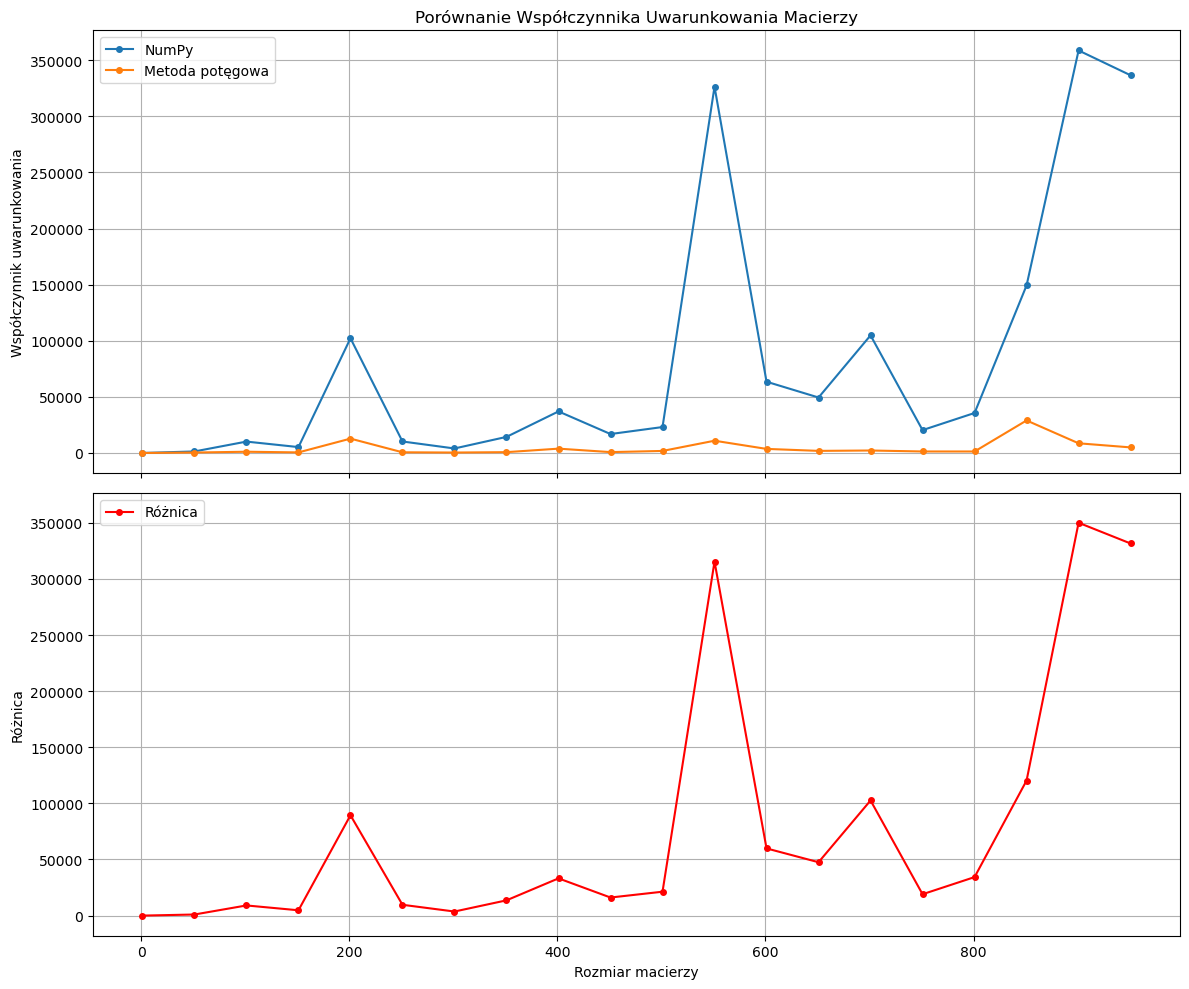

In [121]:
import numpy as np
import matplotlib.pyplot as plt

condNumpy = []
condPower = []
condDiff = []

sizes = list(range(1, 1001,50))  

for i in sizes:
    A_random = np.random.rand(i, i)
    condNumpy.append(np.linalg.cond(A_random))
    condPower.append(condition_number_power_method(A_random))
    condDiff.append(np.abs(condNumpy[-1] - condPower[-1]))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 3]}, sharex=True)

ax1.plot(sizes, condNumpy, label='NumPy', marker='o', markersize=4)
ax1.plot(sizes, condPower, label='Metoda potęgowa', marker='o', markersize=4)
ax1.set_ylabel('Współczynnik uwarunkowania')
ax1.set_title('Porównanie Współczynnika Uwarunkowania Macierzy')
ax1.legend()
ax1.grid(True)

ymin, ymax = ax1.get_ylim()

ax2.plot(sizes, condDiff, label='Różnica', color='red', marker='o', markersize=4)
ax2.set_xlabel('Rozmiar macierzy')
ax2.set_ylabel('Różnica')
ax2.set_ylim(ymin, ymax)
ax2.legend()
ax2.grid(True)

plt.gcf().set_size_inches(12, 10)
plt.tight_layout()
plt.show()

### Wnioski ###
Widzimy że metoda potęgowa na początku daje zbliżone wartości do tej zainplementowanej w NumPy, ale wraz ze wzrostem rozmiaru macierzy różnice zaczynają się powiększać. Wartości współczynnika uwarunkowania rosną wraz z rozmiarem macierzy, co jest zgodne z oczekiwaniami, ponieważ większe macierze mają tendencję do bycia bardziej źle uwarunkowanymi. Różnice między metodami również rosną, co może sugerować, że metoda potęgowa może być mniej dokładna dla większych macierzy lub że może wymagać większej liczby iteracji, aby uzyskać zbliżone wyniki do tych z NumPy.

### Ze względu na typ macierzy ###

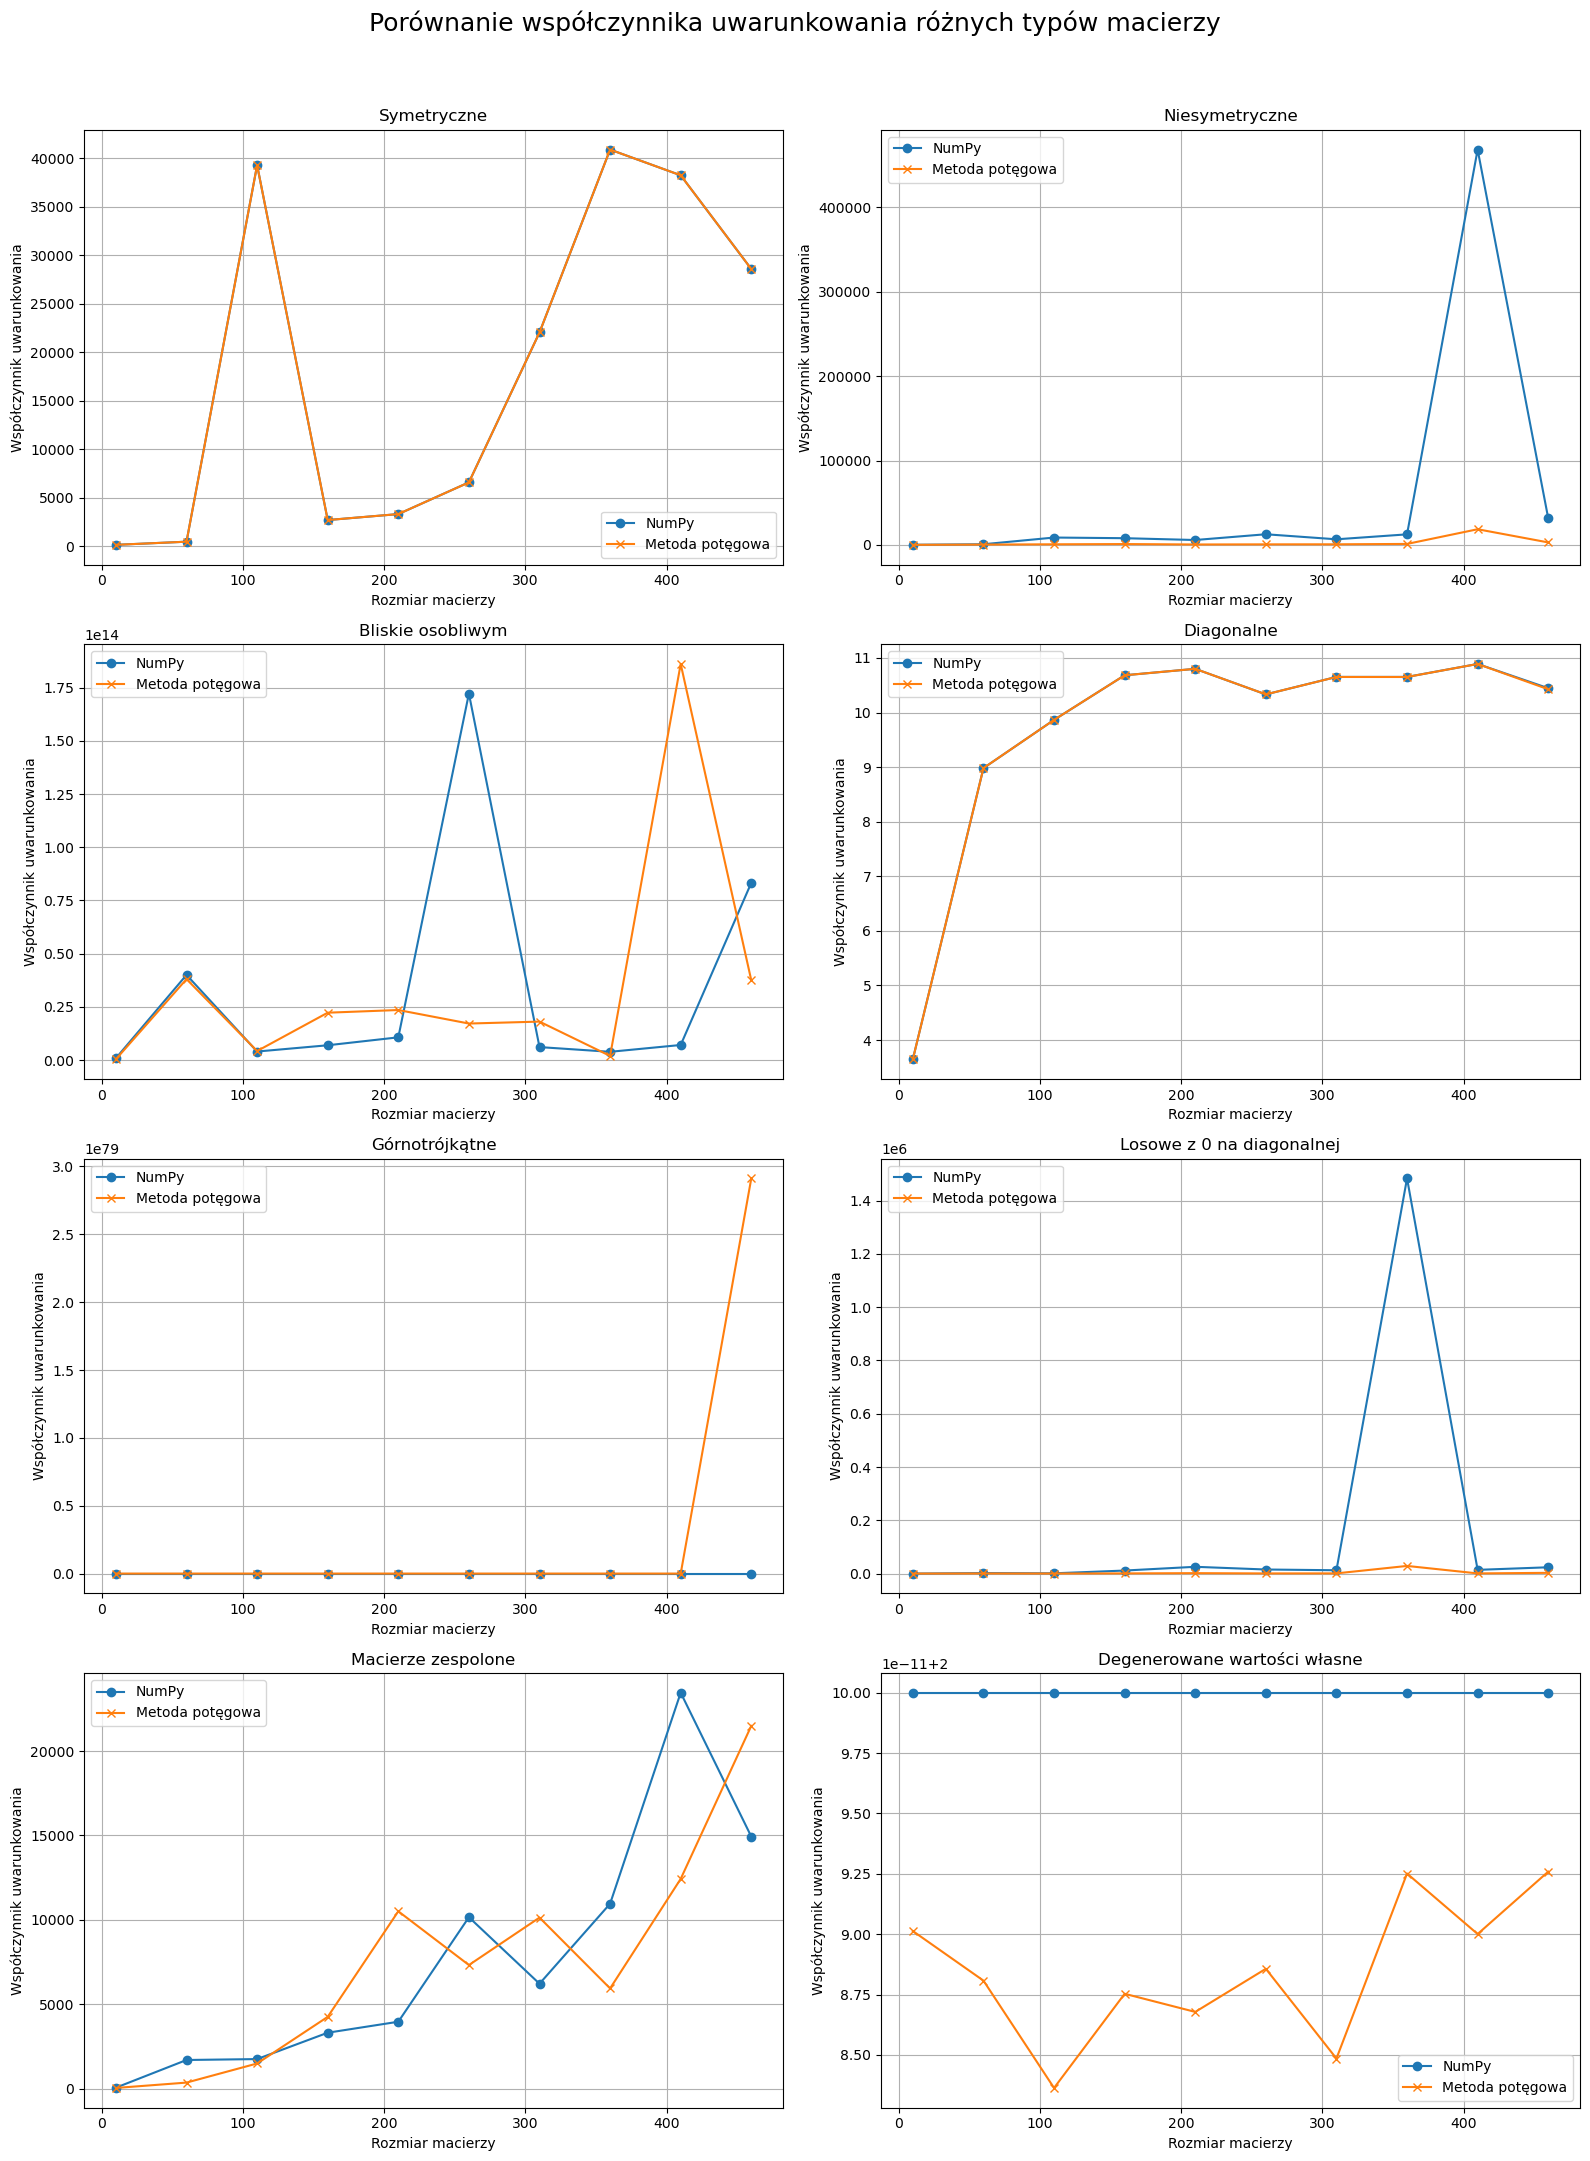

In [126]:
import numpy as np
import matplotlib.pyplot as plt

sizes = list(range(10, 501, 50))

def generate_symmetric_matrix(n):
    M = np.random.rand(n, n)
    return (M + M.T) / 2

def generate_near_singular_matrix(n, epsilon=1e-10):
    M = np.random.rand(n, n)
    M[-1] = M[-2] + epsilon * np.random.rand(n)
    return M

def generate_diagonal_matrix(n):
    return np.diag(np.random.rand(n) + 0.1)  

def generate_upper_triangular_matrix(n):
    M = np.random.rand(n, n)
    return np.triu(M)

def generate_complex_matrix(n):
    real_part = np.random.rand(n, n)
    imag_part = np.random.rand(n, n)
    return real_part + 1j * imag_part

def generate_repeated_eigenvalues_matrix(n):
    vals = np.ones(n) * 5
    vals[0] = vals[1] = 10 
    return np.diag(vals)

def generate_close_eigenvalues_matrix(n):
    vals = np.linspace(1, 10, n)
    vals[-1] = vals[-2] + 1e-8  
    return np.diag(vals)

fig, axs = plt.subplots(4, 2, figsize=(16, 22))
fig.suptitle('Porównanie współczynnika uwarunkowania różnych typów macierzy', fontsize=18)

types = [
    ("Symetryczne", generate_symmetric_matrix),
    ("Niesymetryczne", lambda n: np.random.rand(n, n)),
    ("Bliskie osobliwym", generate_near_singular_matrix),
    ("Diagonalne", generate_diagonal_matrix),
    ("Górnotrójkątne", generate_upper_triangular_matrix),
    ("Losowe z 0 na diagonalnej", lambda n: np.diag(np.zeros(n)) + np.random.rand(n, n)),
    ("Macierze zespolone", generate_complex_matrix),
    ("Degenerowane wartości własne", generate_repeated_eigenvalues_matrix),
    ("Bliskie powtórzonym wartościom", generate_close_eigenvalues_matrix)
]

for ax, (title, gen_func) in zip(axs.flatten(), types):
    condNumpy = []
    condPower = []
    for n in sizes:
        A = gen_func(n)
        condNumpy.append(np.linalg.cond(A))
        try:
            condPower.append(condition_number_power_method(A))
        except Exception:
            condPower.append(np.nan)  
    ax.plot(sizes, condNumpy, label='NumPy', marker='o')
    ax.plot(sizes, condPower, label='Metoda potęgowa', marker='x')
    ax.set_title(title)
    ax.set_xlabel('Rozmiar macierzy')
    ax.set_ylabel('Współczynnik uwarunkowania')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Wnioski

1. **Macierze symetryczne, diagonalne i górnotrójkątne**  
   Obie metody – NumPy i metoda potęgowa – dają zbliżone wyniki współczynnika uwarunkowania. Oznacza to, że metoda potęgowa dobrze radzi sobie z tymi typami macierzy, które mają dobrze rozdzielone wartości własne i prostą strukturę.

2. **Macierze zespolone**  
   Metoda potęgowa nie jest zoptymalizowana do pracy z macierzami zespolonymi, co może prowadzić do mniej dokładnych wyników. Mimo to, w testach różnice między metodami były stosunkowo niewielkie, co może wynikać z charakteru generowanych danych.

3. **Macierze z degenerowanymi (wielokrotnymi) wartościami własnymi**  
   Tutaj metoda potęgowa często zawodzi, ponieważ nie jest w stanie jednoznacznie wyznaczyć dominującej wartości własnej. Na wykresach różnice między wynikami obu metod są największe, co wskazuje na problemy z konwergencją i stabilnością metody potęgowej w takich przypadkach.

4. **Macierze bliskie osobliwości**  
   Metoda potęgowa może mieć trudności z precyzyjnym wyznaczeniem współczynnika uwarunkowania, gdy macierz jest bliska osobliwej (niemal nieodwracalnej). To wynika z problemów z obliczaniem najmniejszej wartości własnej, co wpływa na dokładność współczynnika.

5. **Macierze losowe z zerami na diagonalnej**  
   Tutaj również metoda potęgowa może nie działać poprawnie, ponieważ struktura macierzy (np. obecność zer na przekątnej) komplikuje stabilne wyznaczanie wartości własnych.

---

**Podsumowanie:**  
Metoda potęgowa jest skuteczna i szybka dla dobrze uwarunkowanych macierzy o prostych własnościach (symetryczne, diagonalne, górnotrójkątne), ale jej zastosowanie jest ograniczone dla macierzy o bardziej skomplikowanych właściwościach, takich jak macierze bliskie osobliwości, z degenerowanymi wartościami własnymi czy zespolone. W takich przypadkach warto rozważyć inne metody lub modyfikacje metody potęgowej.


# Test wpływu skalowania, regularizacji i predykcjonowania na współczynnik uwarunkowania macierzy #

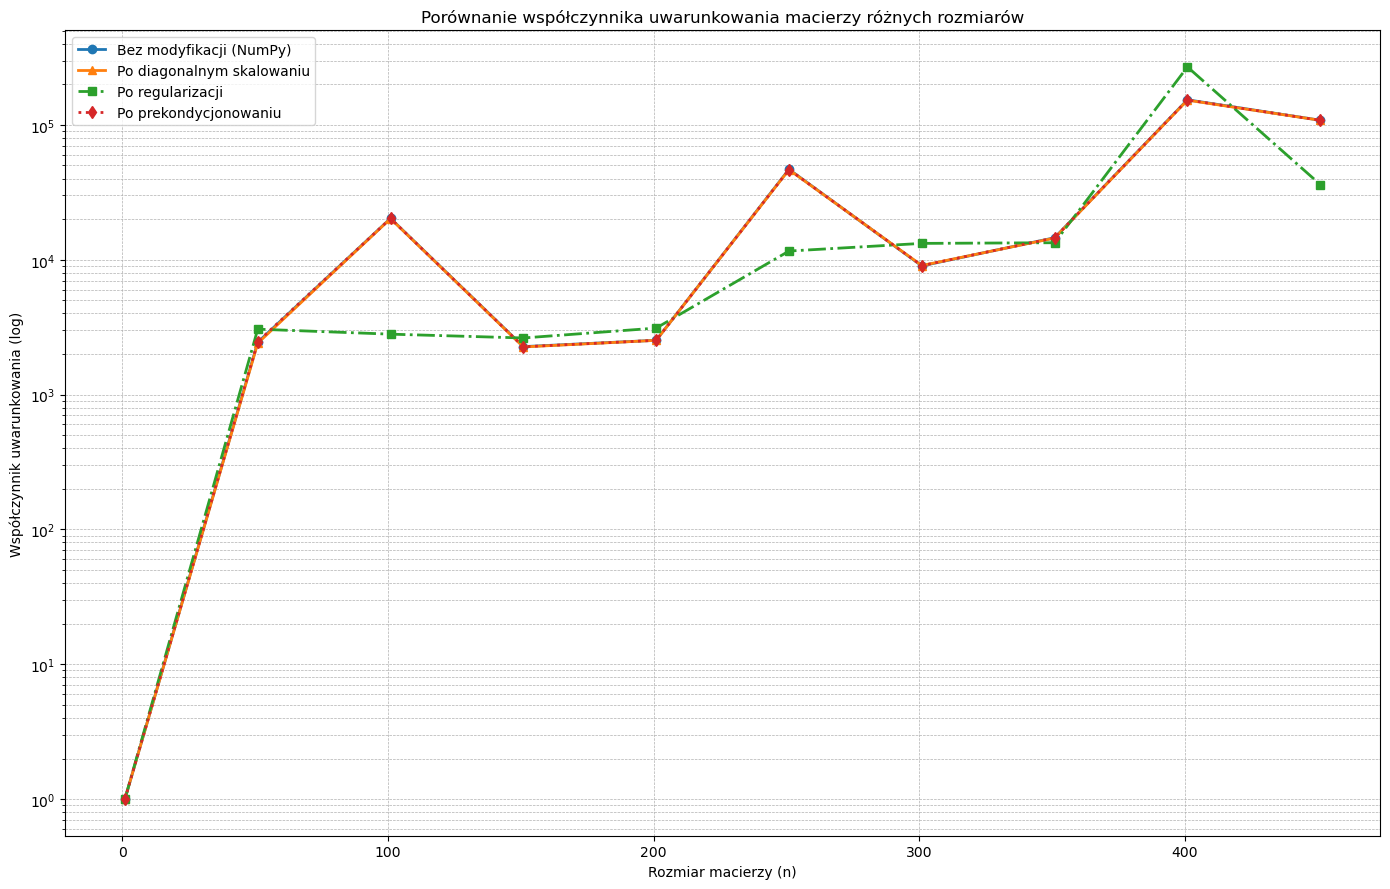

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_matrix(n, sparsity=0.1):
    A = np.random.rand(n, n)
    num_zeros = int(sparsity * n * n)
    zero_indices = np.random.choice(n * n, num_zeros, replace=False)
    A.flat[zero_indices] = 0
    return A

def diagonal_scale_matrix(A):
    row_norms = np.linalg.norm(A, axis=1)
    row_norms[row_norms == 0] = 1
    D_row = np.diag(1 / row_norms)

    col_norms = np.linalg.norm(A, axis=0)
    col_norms[col_norms == 0] = 1
    D_col = np.diag(1 / col_norms)

    A_scaled = D_row @ A @ D_col
    return A_scaled

def regularize_matrix(A, regularization_factor):
    return A + np.eye(A.shape[0]) * regularization_factor

def precondition_matrix(A):
    col_norms = np.linalg.norm(A, axis=0)
    col_norms[col_norms == 0] = 1
    A_prec = A / col_norms
    return A_prec

def calculate_condition_numbers(sizes, regularization_factor):
    cond_npy = []
    cond_diag_scaled = []
    cond_regularized = []
    cond_preconditioned = []

    for n in sizes:
        A = generate_random_matrix(n)

        cond_npy.append(np.linalg.cond(A))

        A_diag_scaled = diagonal_scale_matrix(A)
        cond_diag_scaled.append(np.linalg.cond(A_diag_scaled))

        A_regularized = regularize_matrix(A, regularization_factor)
        cond_regularized.append(np.linalg.cond(A_regularized))

        A_preconditioned = precondition_matrix(A)
        cond_preconditioned.append(np.linalg.cond(A_preconditioned))

    return cond_npy, cond_diag_scaled, cond_regularized, cond_preconditioned

sizes = list(range(1, 501, 50))
regularization_factor = 1e-1

cond_npy, cond_diag_scaled, cond_regularized, cond_preconditioned = calculate_condition_numbers(sizes, regularization_factor)

plt.figure(figsize=(14, 9))
plt.plot(sizes, cond_npy, label='Bez modyfikacji (NumPy)', marker='o', linestyle='-', linewidth=2)
plt.plot(sizes, cond_diag_scaled, label='Po diagonalnym skalowaniu', marker='^', linestyle='-', linewidth=2)
plt.plot(sizes, cond_regularized, label='Po regularizacji', marker='s', linestyle='-.', linewidth=2)
plt.plot(sizes, cond_preconditioned, label='Po prekondycjonowaniu', marker='d', linestyle=':', linewidth=2)

plt.yscale('log') 
plt.title('Porównanie współczynnika uwarunkowania macierzy różnych rozmiarów')
plt.xlabel('Rozmiar macierzy (n)')
plt.ylabel('Współczynnik uwarunkowania (log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Wnioski: #
Widzimy, że regularizacja poprawia uwarunkowanie macierzy – dzieje się tak w większości przypadków.
Mogę zaryzykować stwierdzenie, że jedno z poniższych zdań jest prawdziwe:
NumPy również korzysta z predykcji oraz skalowania do obliczania swoich wyników,
albo ja nie umiem ich poprawnie zaimplementować.
Wyniki są bardzo zbliżone, dlatego wykres nie dostarczył zbyt wielu użytecznych informacji.
Jeżeli został popełniony jakiś błąd, będę wdzięczny za informację na jego temat.
Myślę również, że brak oczekiwanych wyników może wynikać z niewłaściwej analizy danych lub przypadkowego doboru wartości, np. do skalowania, w sposób losowy.

In [145]:
A = np.array([
    [3, 1, 0],
    [1, 4, 2],
    [0, 2, 5]
], dtype=float)

A_scaled = diagonal_scale_matrix(A)
A_regularized = regularize_matrix(A, 1e-1)
A_preconditioned = precondition_matrix(A)

print("Współczynnik uwarunkowania macierzy A (NumPy):", np.linalg.cond(A))
print("Współczynnik uwarunkowania macierzy A scaled (NumPy):", np.linalg.cond(A_scaled))
print("Współczynnik uwarunkowania macierzy A regularized (NumPy):", np.linalg.cond(A_regularized))
print("Współczynnik uwarunkowania macierzy A preconditioned (NumPy):", np.linalg.cond(A_preconditioned))


Współczynnik uwarunkowania macierzy A (NumPy): 3.5953899208567384
Współczynnik uwarunkowania macierzy A scaled (NumPy): 3.8408792398584968
Współczynnik uwarunkowania macierzy A regularized (NumPy): 3.4626264294357756
Współczynnik uwarunkowania macierzy A preconditioned (NumPy): 3.31126487769626


# Jak widzać wartości są inne ale róznice są zbyt małe by było to widoczne na wykresie. #

### Pomysł: przygotwać macierz o takeim samym współczynniku uwarunkowania aby było widac róznice w metodach zwiększenia uwarkunkowania ###

In [147]:
def generate_matrix_with_condition_number(n, condition_number=4):
    random_matrix = np.random.randn(n, n)
    Q, _ = np.linalg.qr(random_matrix)

    eigvals = np.linspace(1, condition_number, n)
    D = np.diag(eigvals)

    A = Q @ D @ Q.T

    return A

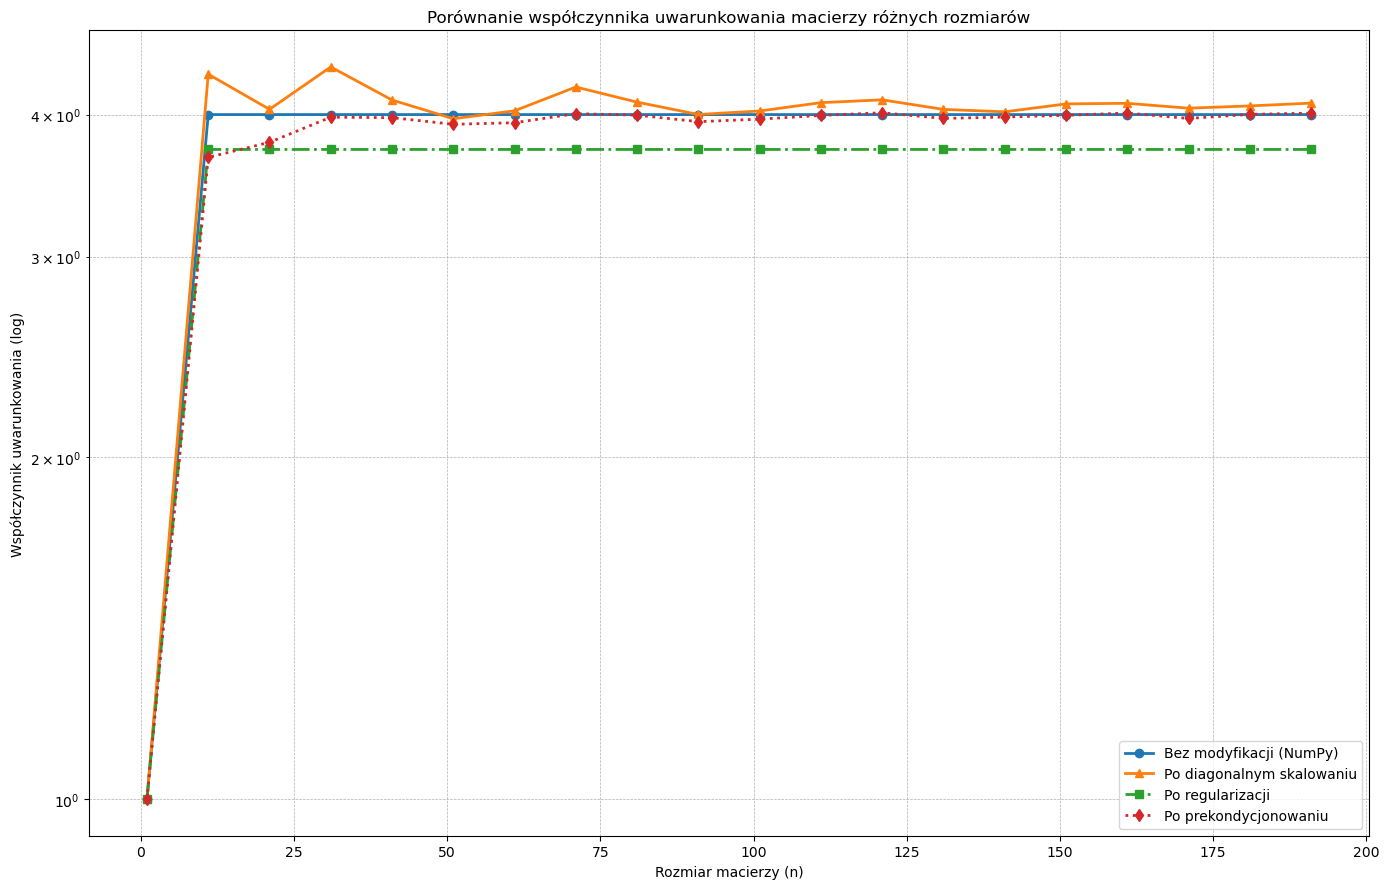

In [152]:
import numpy as np
import matplotlib.pyplot as plt

def diagonal_scale_matrix(A):
    row_norms = np.linalg.norm(A, axis=1)
    row_norms[row_norms == 0] = 1
    D_row = np.diag(1 / row_norms)

    col_norms = np.linalg.norm(A, axis=0)
    col_norms[col_norms == 0] = 1
    D_col = np.diag(1 / col_norms)

    A_scaled = D_row @ A @ D_col
    return A_scaled

def calculate_condition_numbers(sizes, regularization_factor):
    cond_npy = []
    cond_diag_scaled = []
    cond_regularized = []
    cond_preconditioned = []

    for n in sizes:
        A = generate_matrix_with_condition_number(n)

        cond_npy.append(np.linalg.cond(A))

        A_diag_scaled = diagonal_scale_matrix(A)
        cond_diag_scaled.append(np.linalg.cond(A_diag_scaled))

        A_regularized = regularize_matrix(A, regularization_factor)
        cond_regularized.append(np.linalg.cond(A_regularized))

        A_preconditioned = precondition_matrix(A)
        cond_preconditioned.append(np.linalg.cond(A_preconditioned))

    return cond_npy, cond_diag_scaled, cond_regularized, cond_preconditioned

sizes = list(range(1, 201, 10))
regularization_factor = 1e-1

cond_npy, cond_diag_scaled, cond_regularized, cond_preconditioned = calculate_condition_numbers(sizes, regularization_factor)

plt.figure(figsize=(14, 9))
plt.plot(sizes, cond_npy, label='Bez modyfikacji (NumPy)', marker='o', linestyle='-', linewidth=2)
plt.plot(sizes, cond_diag_scaled, label='Po diagonalnym skalowaniu', marker='^', linestyle='-', linewidth=2)
plt.plot(sizes, cond_regularized, label='Po regularizacji', marker='s', linestyle='-.', linewidth=2)
plt.plot(sizes, cond_preconditioned, label='Po prekondycjonowaniu', marker='d', linestyle=':', linewidth=2)

plt.yscale('log') 
plt.title('Porównanie współczynnika uwarunkowania macierzy różnych rozmiarów')
plt.xlabel('Rozmiar macierzy (n)')
plt.ylabel('Współczynnik uwarunkowania (log)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Wnioski: #
Na podstawie powyższego wykresu można stwierdzić, że najlepsze wyniki osiągnięto dzięki zastosowaniu regularizacji – metoda ta sprawdziła się zdecydowanie najlepiej. Kolejnym skutecznym podejściem, poprawiającym uwarunkowanie problemu, okazała się metoda predykcji. Skalowanie natomiast, zgodnie z przewidywaniami, dawało rezultaty zmienne – czasami lepsze, czasami gorsze. Wynika to prawdopodobnie z niedostosowania samej metody lub, precyzyjniej, zastosowanej macierzy skalującej.